# Predicit if the income of the individual is greater than 50k or not.

In [1]:
# Importing necessary modules/libraries....
import numpy as np 
import pandas as pd
# Importing matplotlib library for data visualisation...
import matplotlib.pyplot as plt
# Importing seaborn for heatmap and correlation
import seaborn as sns
%matplotlib inline
# Libraries for building models on our dataset.... 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Importing/ Loading the dataset as dataframe in some variable and renaming its columns
income_df = pd.read_excel(r'C:\Users\DELL\Desktop\Machine Learning\Assignment.xlsx', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                           'maritalStatus', 'occupation', 'relationship', 'race',
                                           'sex', 'capitalGain', 'capitalLoss', 'hours-per-week',
                                           'nativeCountry', 'salary'])

In [3]:
# Exploring dataset
print("Shape is: ",income_df.shape)
print()
print(income_df.info())
print()
# printing the column names of the dataset
print(income_df.columns)
print()
income_df.head(10)

Shape is:  (48842, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
maritalStatus     48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capitalGain       48842 non-null int64
capitalLoss       48842 non-null int64
hours-per-week    48842 non-null int64
nativeCountry     48842 non-null object
salary            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hours-per-week', 'nativeCountry',
       's

,age,workclass,fnlwgt,education,education-num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hours-per-week,nativeCountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Getting the general overview about dataset
income_df.describe()

,age,fnlwgt,education-num,capitalGain,capitalLoss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Cleaning the dataset

In [5]:
print("Before cleaning the dataset: \n",income_df['salary'].value_counts())
# Replacing the 50K. with 50K
income_df['salary'] = income_df.salary.apply(lambda x: x.replace('<=50K.', '<=50K'))
income_df['salary'] = income_df.salary.apply(lambda x: x.replace('>50K.', '>50K'))
print()
print("After cleaning the dataset: \n",income_df['salary'].value_counts())

Before cleaning the dataset: 
  <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: salary, dtype: int64

After cleaning the dataset: 
  <=50K    37155
 >50K     11687
Name: salary, dtype: int64


In [6]:
print("Before cleaning the dataset: \n",income_df['maritalStatus'].value_counts())
income_df['maritalStatus']=income_df.maritalStatus.apply(lambda x:x.replace('Married-civ-spouse','Married'))
income_df['maritalStatus']=income_df.maritalStatus.apply(lambda x:x.replace('Married-AF-spouse','Married'))
income_df['maritalStatus']=income_df.maritalStatus.apply(lambda x:x.replace('Married-spouse-absent','Married'))
income_df['maritalStatus']=income_df.maritalStatus.apply(lambda x:x.replace('Separated','Divorced'))
print()
print("After cleaning the dataset: \n",income_df['maritalStatus'].value_counts())

Before cleaning the dataset: 
  Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: maritalStatus, dtype: int64

After cleaning the dataset: 
  Married          23044
 Never-married    16117
 Divorced          8163
 Widowed           1518
Name: maritalStatus, dtype: int64


In [7]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']
print("Before cleaning the dataset: \n",income_df['maritalStatus'].value_counts())
income_df['education']=income_df.education.apply(lambda x:x.replace('HS-grad','HSGrad'))
income_df['education']=income_df.education.apply(lambda x:x.replace('11th','HSGrad'))
income_df['education']=income_df.education.apply(lambda x:x.replace('10th','HSGrad'))
income_df['education']=income_df.education.apply(lambda x:x.replace('9th','HSGrad'))
income_df['education']=income_df.education.apply(lambda x:x.replace('12th','HSGrad'))
income_df['education']=income_df.education.apply(lambda x:x.replace('1st-4th','elementary_school'))
income_df['education']=income_df.education.apply(lambda x:x.replace('5th-6th','elementary_school'))
income_df['education']=income_df.education.apply(lambda x:x.replace('7th-8th','elementary_school'))
print()
print("After cleaning the dataset: \n",income_df['maritalStatus'].value_counts())

Before cleaning the dataset: 
  Married          23044
 Never-married    16117
 Divorced          8163
 Widowed           1518
Name: maritalStatus, dtype: int64

After cleaning the dataset: 
  Married          23044
 Never-married    16117
 Divorced          8163
 Widowed           1518
Name: maritalStatus, dtype: int64


In [8]:
print("Before replacing the '?' values\n")
income_df.head(20)

Before replacing the '?' values



,age,workclass,fnlwgt,education,education-num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hours-per-week,nativeCountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HSGrad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,HSGrad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,HSGrad,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HSGrad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
# Replacing ? with null values
income_df['nativeCountry']=income_df.nativeCountry.apply(lambda x:x.replace('?',''))
income_df['occupation']=income_df.occupation.apply(lambda x:x.replace('?',''))
income_df['workclass']=income_df.workclass.apply(lambda x:x.replace('?',''))
print("After replacement\n")
income_df.head(20)

After replacement



,age,workclass,fnlwgt,education,education-num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hours-per-week,nativeCountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HSGrad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,HSGrad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,HSGrad,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HSGrad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
# Identifying the categorical and numerical parameters
numeric_parameters = income_df.dtypes[income_df.dtypes != "object"]
categorical_parameters = income_df.dtypes[income_df.dtypes == "object"]
print("Categorical variables are:\n"+str(categorical_parameters))
print("\n\nNumeric variables are:\n"+str(numeric_parameters))

Categorical variables are:
workclass        object
education        object
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
nativeCountry    object
salary           object
dtype: object


Numeric variables are:
age               int64
fnlwgt            int64
education-num     int64
capitalGain       int64
capitalLoss       int64
hours-per-week    int64
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F9E5CD358>,
      dtype=object)

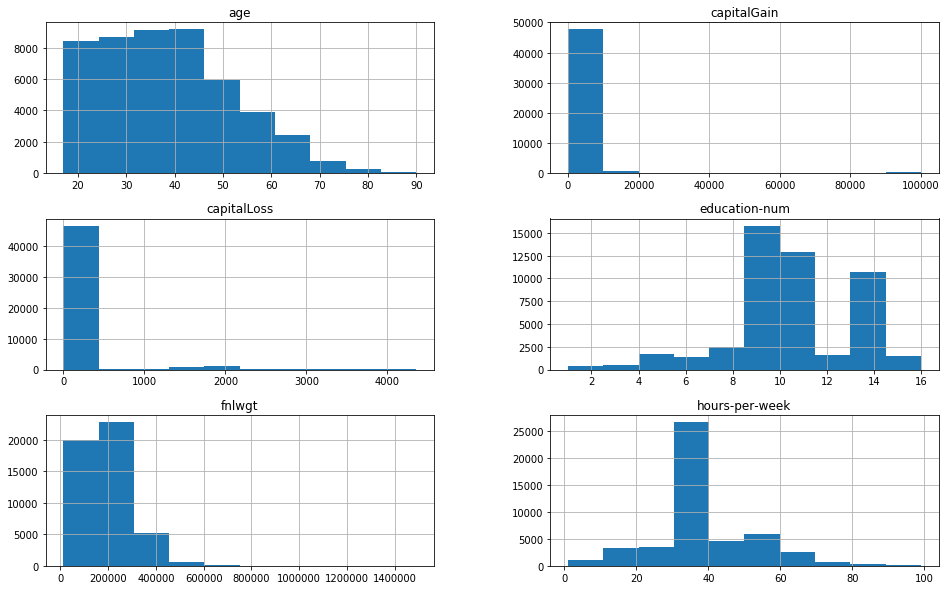

In [11]:
# Plotting histogram of the numerical parameters to identify the outliers
income_df[numeric_parameters.index].hist(figsize=(16,10))

In [12]:
# Removing outliers from column 'age'
print("Number of observation before removing:",income_df.shape)
age = income_df[income_df['age'] == 90].index
income_df.drop(labels = age,axis = 0,inplace =True)
print("Number of observation after removing:",income_df.shape)

Number of observation before removing: (48842, 15)
Number of observation after removing: (48787, 15)


In [14]:
print("Number of observation before removing:",income_df.shape)
fnlwgt = income_df[income_df['fnlwgt'] > 750000].index
income_df.drop(labels = fnlwgt,axis = 0,inplace =True)
print("Number of observation after removing:",income_df.shape)

Number of observation before removing: (48721, 15)
Number of observation after removing: (48721, 15)


In [15]:
# Removing the outliers from capitalGain column
print("Number of observation before removing:",income_df.shape)
gain = income_df[income_df['capitalGain'] == 99999].index
income_df.drop(labels = gain,axis = 0,inplace =True)
print("Number of observation after removing:",income_df.shape)

Number of observation before removing: (48721, 15)
Number of observation after removing: (48477, 15)


In [16]:
# Dropping column education as education-num has high correlation with education
income_df.drop(['education'], axis=1, inplace=True)
income_df.head(10)

,age,workclass,fnlwgt,education-num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hours-per-week,nativeCountry,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [18]:
# Converting categorical variables to numerical ones
dummies = pd.get_dummies(income_df.drop(['salary', 'age', 'capitalGain', 'capitalLoss',
                                        'hours-per-week'], axis=1))

In [19]:
# printing shape and top rows of the dataset
print("Shape of dummies: ",dummies.shape)
dummies.head(15)

Shape of dummies:  (48477, 85)


,fnlwgt,education-num,workclass_,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,77516,13,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,83311,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,215646,9,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,234721,7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,338409,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,284582,14,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,160187,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,209642,9,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,45781,14,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,159449,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Concatention of existing columns with newly created ones
merged = pd.concat([income_df, dummies], axis=1)

In [21]:
print("Shape of dataset now is: ",merged.shape)
merged.head(5)

Shape of dataset now is:  (48477, 99)


,age,workclass,fnlwgt,education-num,maritalStatus,occupation,relationship,race,sex,capitalGain,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,13,Married,Exec-managerial,Husband,White,Male,0,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,7,Married,Handlers-cleaners,Husband,Black,Male,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,13,Married,Prof-specialty,Wife,Black,Female,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Printing final columns of the dataset
merged.columns[:100]

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'maritalStatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalGain',
       'capitalLoss', 'hours-per-week', 'nativeCountry', 'salary', 'fnlwgt',
       'education-num', 'workclass_ ', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'maritalStatus_ Divorced', 'maritalStatus_ Married',
       'maritalStatus_ Never-married', 'maritalStatus_ Widowed',
       'occupation_ ', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'o

In [22]:
# dropping the categorical columns
final_df = merged.drop(['workclass', 'maritalStatus', 'occupation', 'relationship',
                       'race', 'sex', 'nativeCountry'], axis=1)
print("Printing shape of the dataset: ",final_df.shape)
final_df.head(10)

Printing shape of the dataset:  (48477, 92)


,age,fnlwgt,education-num,capitalGain,capitalLoss,hours-per-week,salary,fnlwgt,education-num,workclass_,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,77516,13,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,83311,13,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,215646,9,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,234721,7,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,338409,13,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,<=50K,284582,14,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,<=50K,160187,5,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,>50K,209642,9,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,>50K,45781,14,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,>50K,159449,13,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('salary', axis=1), final_df.salary, 
                                                   test_size=0.33, random_state=1)

In [24]:
# printing the size of the train and test variables
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)

X_train size:  (32479, 91)
X_test size:  (15998, 91)


# Applying Logistic Regression

In [25]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("Accuracy for Logistic Regression model is: ",metrics.accuracy_score(y_test, predictions))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     12220
        >50K       0.71      0.24      0.36      3778

   micro avg       0.80      0.80      0.80     15998
   macro avg       0.76      0.60      0.62     15998
weighted avg       0.78      0.80      0.76     15998

Accuracy for Logistic Regression model is:  0.7974121765220653


# Applying KNN

In [26]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("Accuracy for KNN model is: ",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.81      0.92      0.86     12220
        >50K       0.54      0.31      0.39      3778

   micro avg       0.78      0.78      0.78     15998
   macro avg       0.68      0.61      0.63     15998
weighted avg       0.75      0.78      0.75     15998

Accuracy for KNN model is:  0.7752844105513189


# Applying Decision Tree Classifier

In [27]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("Accuracy for Decision Tree Classifier model is: ",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     12220
        >50K       0.62      0.62      0.62      3778

   micro avg       0.82      0.82      0.82     15998
   macro avg       0.75      0.75      0.75     15998
weighted avg       0.82      0.82      0.82     15998

Accuracy for Decision Tree Classifier model is:  0.8199774971871484


# Applying Random Forest Classifier

In [28]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("Accuracy for Random Forest Classifier model is: ",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     12220
        >50K       0.74      0.61      0.67      3778

   micro avg       0.86      0.86      0.86     15998
   macro avg       0.81      0.77      0.79     15998
weighted avg       0.85      0.86      0.85     15998

Accuracy for Random Forest Classifier model is:  0.8574196774596825


# Applying GaussianNB

In [29]:
nb=GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("Accuracy for Naive Bayes model is: ",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     12220
        >50K       0.63      0.29      0.40      3778

   micro avg       0.79      0.79      0.79     15998
   macro avg       0.72      0.62      0.64     15998
weighted avg       0.77      0.79      0.76     15998

Accuracy for Naive Bayes model is:  0.7924115514439305


# Applying Gradient Boosting Classifier

In [30]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
predictions = gbm.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("Accuracy for Gradient Boosting model is: ",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92     12220
        >50K       0.80      0.61      0.69      3778

   micro avg       0.87      0.87      0.87     15998
   macro avg       0.84      0.78      0.80     15998
weighted avg       0.87      0.87      0.86     15998

Accuracy for Gradient Boosting model is:  0.870796349543693
